## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
# check gpu resource
!nvidia-smi

Tue Mar 26 14:13:40 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 419.35       Driver Version: 419.35       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 750    WDDM  | 00000000:01:00.0  On |                  N/A |
| 40%   27C    P8     1W /  38W |    308MiB /  1024MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
import os
import keras
from keras.models import Sequential
from keras.layers import Dense
# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[128,64,32]):
    model=Sequential()
    model.add(Dense(units=input_shape[1],input_dim=input_shape[1],kernel_initializer='normal',activation='relu',name='input'))
    for i, n_unit in enumerate(num_neurons):
        model.add(Dense(units=n_unit, kernel_initializer='normal', activation='relu',name='hidden'+str(i+1)))
    model.add(Dense(units=output_units,kernel_initializer='normal',activation='softmax',name='output'))
    return model

In [7]:
model=build_mlp(input_shape=x_train.shape)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 3072)              9440256   
_________________________________________________________________
hidden1 (Dense)              (None, 128)               393344    
_________________________________________________________________
hidden2 (Dense)              (None, 64)                8256      
_________________________________________________________________
hidden3 (Dense)              (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 9,844,266
Trainable params: 9,844,266
Non-trainable params: 0
_________________________________________________________________


In [8]:
## 超參數設定
"""
Set your hyper-parameters
"""
LEARNING_RATE = [0.01]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.6,0.8,1.0]

## Using nesterov

In [9]:
results = {}
"""
Build the experiment loop
"""
for momentum in MOMENTUM:
    keras.backend.clear_session() #清掉舊的graph
    print(f"Experiment with momentum = {momentum}")
    # construct model
    model=build_mlp(input_shape=x_train.shape)
    model.summary()
    # set hyper-parameters
    optimizer=keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=momentum)
    # compile model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])
    # fit model
    model.fit(x_train,y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_test,y_test),
              shuffle=True)
    
    # collect results
    train_loss=model.history.history['loss']
    valid_loss=model.history.history['val_loss']
    train_acc=model.history.history['acc']
    valid_acc=model.history.history['val_acc']
    
    # construct dictionary: experiment names/ results
    exp_name_tag="exp_momentum_%s" %str(momentum)
    results[exp_name_tag]={'train_loss':train_loss,
                           'valid_loss':valid_loss,
                           'train_acc':train_acc,
                           'valid_acc':valid_acc}

Experiment with momentum = 0.6
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 3072)              9440256   
_________________________________________________________________
hidden1 (Dense)              (None, 128)               393344    
_________________________________________________________________
hidden2 (Dense)              (None, 64)                8256      
_________________________________________________________________
hidden3 (Dense)              (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 9,844,266
Trainable params: 9,844,266
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epo

50000/50000 [==============================] - 7s 131us/step - loss: 0.8943 - acc: 0.6785 - val_loss: 1.6176 - val_acc: 0.4844s - loss:
Experiment with momentum = 0.8
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 3072)              9440256   
_________________________________________________________________
hidden1 (Dense)              (None, 128)               393344    
_________________________________________________________________
hidden2 (Dense)              (None, 64)                8256      
_________________________________________________________________
hidden3 (Dense)              (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 9,844,266
Trainable params: 9,844,266
Non-trainable params: 0
_______________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.9989 - acc: 0.2603 - val_loss: 1.8425 - val_acc: 0.3455
Epoch 2/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.8349 - acc: 0.3385 - val_loss: 1.8343 - val_acc: 0.3194
Epoch 3/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.7913 - acc: 0.3520 - val_loss: 1.8108 - val_acc: 0.3424
Epoch 4/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.8416 - acc: 0.3212 - val_loss: 1.8243 - val_acc: 0.3416
Epoch 5/50
50000/50000 [==============================] - 7s 132us/step - loss: 3.3974 - acc: 0.1306 - val_loss: 3.0617 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 7s 132us/step - loss: 2.7699 - acc: 0.0963 - val_loss: 2.7508 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 7s 132us/step - loss: 2.8275 - acc: 0.1003 - val_loss: 2.7717 - 

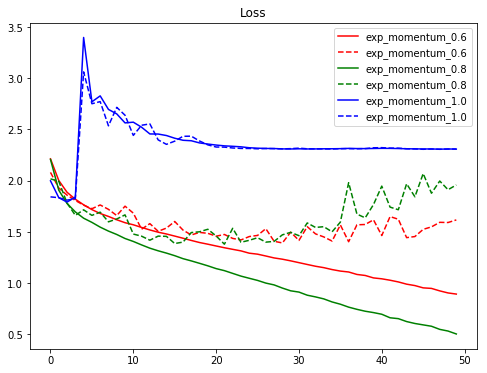

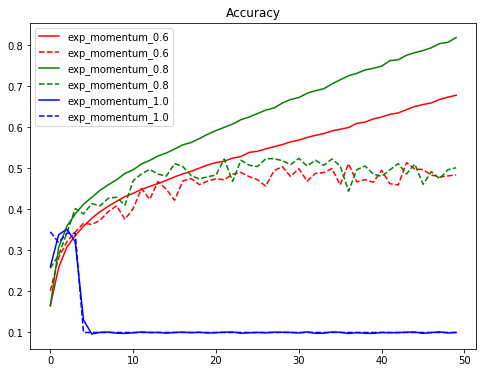

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar=['r','g','b','y','m','k']
"""
Draw the results
"""
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_loss'])), results[cond]['train_loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_loss'])), results[cond]['valid_loss'],'--', label=cond, color=color_bar[i])
plt.title('Loss')
plt.legend()
plt.show

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])), results[cond]['train_acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_acc'])), results[cond]['valid_acc'], '--', label=cond, color=color_bar[i])
plt.title('Accuracy')
plt.legend()
plt.show()

## Not using neterov

In [11]:
results2 = {}
"""
Build the experiment loop
"""
for momentum in MOMENTUM:
    keras.backend.clear_session() #清掉舊的graph
    print(f"Experiment with momentum = {momentum}")
    # construct model
    model2=build_mlp(input_shape=x_train.shape)
    model2.summary()
    # set hyper-parameters (nesterov=False)
    optimizer=keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=False, momentum=momentum)
    # compile model
    model2.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])
    # fit model
    model2.fit(x_train,y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_test,y_test),
              shuffle=True)
    
    # collect results
    train_loss=model2.history.history['loss']
    valid_loss=model2.history.history['val_loss']
    train_acc=model2.history.history['acc']
    valid_acc=model2.history.history['val_acc']
    
    # construct dictionary: experiment names/ results
    exp_name_tag="exp_momentum_%s" %str(momentum)
    results2[exp_name_tag]={'train_loss':train_loss,
                            'valid_loss':valid_loss,
                            'train_acc':train_acc,
                            'valid_acc':valid_acc}

Experiment with momentum = 0.6
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 3072)              9440256   
_________________________________________________________________
hidden1 (Dense)              (None, 128)               393344    
_________________________________________________________________
hidden2 (Dense)              (None, 64)                8256      
_________________________________________________________________
hidden3 (Dense)              (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 9,844,266
Trainable params: 9,844,266
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 129us/step - loss: 2.1422 - acc: 0.2033 - val_loss: 1.9537 - val_acc: 0.2739
Epoch 2/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.8735 - acc: 0.3126 - val_loss: 1.8229 - val_acc: 0.3349
Epoch 3/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.7687 - acc: 0.3569 - val_loss: 1.7293 - val_acc: 0.3700
Epoch 4/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.6974 - acc: 0.3869 - val_loss: 1.6958 - val_acc: 0.3849
Epoch 5/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.6451 - acc: 0.4072 - val_loss: 1.7099 - val_acc: 0.3856
Epoch 6/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.5953 - acc: 0.4252 - val_loss: 1.5635 - val_acc: 0.4387
Epoch 7/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.5593 - acc: 0.4403 - val_loss: 1.5498 - 

Epoch 2/50
50000/50000 [==============================] - 6s 119us/step - loss: 2.0627 - acc: 0.2173 - val_loss: 2.0566 - val_acc: 0.1775
Epoch 3/50
50000/50000 [==============================] - 6s 119us/step - loss: 2.2717 - acc: 0.1369 - val_loss: 2.4483 - val_acc: 0.1001
Epoch 4/50
50000/50000 [==============================] - 6s 119us/step - loss: 2.3939 - acc: 0.1021 - val_loss: 2.3285 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 6s 119us/step - loss: 2.4021 - acc: 0.0993 - val_loss: 2.3356 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 6s 119us/step - loss: 2.4064 - acc: 0.0995 - val_loss: 2.3835 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 6s 119us/step - loss: 2.3899 - acc: 0.1031 - val_loss: 2.4334 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 6s 119us/step - loss: 2.3805 - acc: 0.1003 - val_loss: 2.4431 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==========

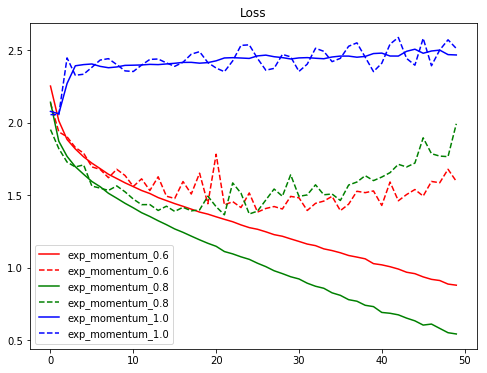

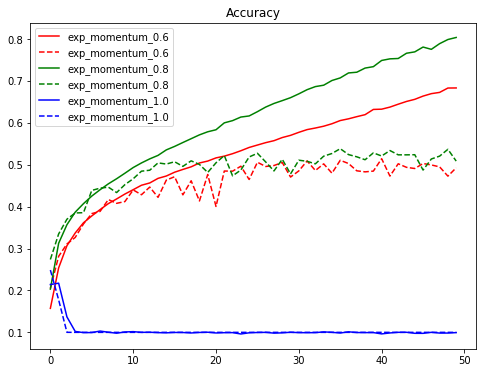

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar=['r','g','b','y','m','k']
"""
Draw the results
"""
plt.figure(figsize=(8,6))
for i, cond in enumerate(results2.keys()):
    plt.plot(range(len(results2[cond]['train_loss'])), results2[cond]['train_loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results2[cond]['valid_loss'])), results2[cond]['valid_loss'],'--', label=cond, color=color_bar[i])
plt.title('Loss')
plt.legend()
plt.show

plt.figure(figsize=(8,6))
for i, cond in enumerate(results2.keys()):
    plt.plot(range(len(results2[cond]['train_acc'])), results2[cond]['train_acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results2[cond]['valid_acc'])), results2[cond]['valid_acc'], '--', label=cond, color=color_bar[i])
plt.title('Accuracy')
plt.legend()
plt.show()